<a href="https://colab.research.google.com/github/muriloborges16/Tecnicas-de-Pre-processamento/blob/main/Murilo_Borges_Pr%C3%A9_processamento_e_An%C3%A1lise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas de Pré-processamento e Análise exploratória

Técnicas de **pré-processamento** e **análise exploratória** são etapas importantes no processo de análise de dados.

Quando trabalhamos com análise de dados normalmente lidamos com datasets que, na maioria dos casos estão sem nenhum tipo de pré-processamento, porém para realizarmos a análise exploratória precisamos tratar estes dados e garantir que estejam em um formato adequado para serem usados na análise e que não contenham erros ou valores inválidos.

O **pré-processamento de dados** envolve a preparação dos dados para análise, que pode incluir várias atividades, como limpeza de dados, preenchimento de valores faltantes, transformação de dados, normalização de dados, seleção de recursos relevantes, dentre outros.

Já a **análise exploratória** envolve a exploração e a compreensão dos dados, utilizando diversas técnicas estatísticas e de visualização. Essas técnicas permitem entender melhor a distribuição dos dados, identificar padrões, tendências, relações e outliers, avaliar a qualidade dos dados, e obter informações claras e objetivas sobre o problema que está sendo analisado.

# Base de Dados

Para entender melhor algumas dessas técnicas, iremos fazer uma aplicação em um dataset do Kaggle, que pode ser encontrado [aqui](https://www.kaggle.com/datasets/muqarrishzaib/tmdb-10000-movies-dataset).

O dataset contém informações sobre 10.000 filmes e o conjunto de dados foi criado a partir da API oficial fornecida pelo TMDB.

As colunas no arquivo incluem:



* Id
* linguagem original
* título original
* visão geral
* popularidade
* data de lançamento
* título
* Nota do público
* Quandtidade votos 

# Importação e Consolidação dos Dados

A manipulação dos dados será realizada com a biblioteca Pandas.

In [39]:
#Importando o Pandas
import pandas as pd

A importação dos dados para o collab pode ser feita de diferentes maneiras.

Você pode fazer upload do arquivodiretamente para o collab, importar via URL ou via Google Drive fazendo upload do arquivo para alguma pasta da sua conta do Drive.

Para acessar os arquivos da sua conta no Google Drive você precisa executar o código da célula abaixo 

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Importando a base para o dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TMDB 10000 Movies Dataset.csv")

### Manipulação do Dataframe

In [42]:
#visualização do dataframe
df

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242


In [43]:
#mostrando quantidade de linhas e colunas no Dataframe
df.shape

(10000, 9)

In [44]:
#visualizar os nomes das colunas
df.columns

Index(['id', 'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [45]:
#Visualizar a informações sobre as colunas do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   overview           9994 non-null   object 
 4   popularity         10000 non-null  float64
 5   release_date       10000 non-null  object 
 6   title              10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


# Pré-processamento

###Fazendo a filtragem das colunas para uma cópia do DF e removendo a coluna ID pois estava confusa com numeros aleatórios.

In [46]:
dfcopia = df.filter(items=['original_language', 'original_title',	'overview',	'popularity',	'release_date',	'title',	'vote_average',	'vote_count'])

###Renomeando as colunas para o Português para ficar mais fácil para entender do que se trata cada coluna.

In [47]:
dfcopia.rename(columns = { 'original_language': 'Idioma_Original', 
                          'original_title' : 'Título_Original',
                          'popularity' : 'Qtd_Visualizações',	
                          'release_date' : 'Data_Lançamento',
                          'title': 'Nome_Filme',
                          'overview': 'Sinopse',
                          'vote_average':'Nota do Público',
                          'vote_count': 'Qtd de votos'},
  inplace = True)

###Visualizando as informações do Dataframe para identificar quais colunas possuem valores nulos.

In [48]:
#o comando info() já mostra quantos valores estão preenchidos por coluna
dfcopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idioma_Original    10000 non-null  object 
 1   Título_Original    10000 non-null  object 
 2   Sinopse            9994 non-null   object 
 3   Qtd_Visualizações  10000 non-null  float64
 4   Data_Lançamento    10000 non-null  object 
 5   Nome_Filme         10000 non-null  object 
 6   Nota do Público    10000 non-null  float64
 7   Qtd de votos       10000 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


###Visualizando a coluna "Sinopse" que possui valores Nulos.

In [49]:
#Visializando a quantidade de valores nulos na coluna Sinopse
dfcopia['Sinopse'].isnull().sum()

6

In [50]:
#Mostrando as valores nulos na coluna
dfcopia.loc[dfcopia['Sinopse'].isnull()]

,Idioma_Original,Título_Original,Sinopse,Qtd_Visualizações,Data_Lançamento,Nome_Filme,Nota do Público,Qtd de votos
3957,en,Step Up,NaN,21.672,2006-08-11,Step Up,6.9,3342
7393,fr,La Vérité si je mens ! 2,NaN,6.522,2001-02-07,Would I Lie to You? 2,6.2,336
8341,fr,Tanguy,NaN,7.111,2001-11-21,Tanguy,5.9,398
8833,en,"Amore, bugie e calcetto",NaN,6.172,2008-04-04,"Amore, bugie e calcetto",5.8,203
9609,fr,Incognito,NaN,7.490,2009-04-28,Incognito,5.5,216
9993,it,Colpi di fulmine,NaN,5.767,2012-12-13,Lightning Strike,5.3,217


###Tratando valores nulos.

Para tratar valores nulos existem alguma técnicas que podem ser utilizadas.

In [51]:
#apaga todas as linhas que tenham algum valor nulo no dataframe
#o parâmetro inplace altera no arquivo original

dfcopia.dropna(inplace=True)

In [52]:
#apaga as linhas da(s) coluna(s) especificada(s) no subset que tenham algum valor nulo
dfcopia.dropna(subset=['Sinopse'],inplace=True)

In [53]:
#substitui os valores nulos por um novo valor
dfcopia.Sinopse = dfcopia.Sinopse.fillna("NAO_DEFINIDO")

**Dependendo da quantidade de valores ausentes no dataframe uma dessas tecnicas podem ser aplicadas.**

* Se os dados ausentes estão em pequeno número,ocorrem aleatoriamente, e a ausência não carrega significado, é melhor excluir a linha. No caso da coluna, se ainda for possível analisar alguma parte dela, use-a, como é o caso aqui. Mas para algumas situações, o ideal é excluir a coluna.

* Preencher valores ausentes permite que você mantenha dados existentes em outras células. 

In [54]:
dfcopia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idioma_Original    9994 non-null   object 
 1   Título_Original    9994 non-null   object 
 2   Sinopse            9994 non-null   object 
 3   Qtd_Visualizações  9994 non-null   float64
 4   Data_Lançamento    9994 non-null   object 
 5   Nome_Filme         9994 non-null   object 
 6   Nota do Público    9994 non-null   float64
 7   Qtd de votos       9994 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 702.7+ KB


### Visualizando Informações no Dataframe

In [55]:
#o atributo .loc seleciona as linhas conforme o parâmetro passado
dfcopia = dfcopia.loc[dfcopia['Idioma_Original'] == 'en']

In [56]:
dfcopia

,Idioma_Original,Título_Original,Sinopse,Qtd_Visualizações,Data_Lançamento,Nome_Filme,Nota do Público,Qtd de votos
1,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
6,en,Schindler's List,The true story of how businessman Oskar Schind...,52.121,1993-12-15,Schindler's List,8.6,13486
10,en,12 Angry Men,The defense and the prosecution have rested an...,33.678,1957-04-10,12 Angry Men,8.5,6826
...,...,...,...,...,...,...,...,...
9992,en,The Head Hunter,"On the outskirts of a kingdom, a quiet but fie...",11.145,2019-04-05,The Head Hunter,5.3,238
9994,en,10 x 10,"Lewis is an outwardly ordinary guy, but in rea...",14.890,2018-04-13,10x10,5.3,464
9995,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9997,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839


In [57]:
#retorna a quantidade de cada valor encontrado na coluna
dfcopia['Idioma_Original'].value_counts()

en    7734
Name: Idioma_Original, dtype: int64

In [58]:
#visualiza as duplicatas
dfcopia[dfcopia.duplicated(keep=False)].sort_values('Nome_Filme')

,Idioma_Original,Título_Original,Sinopse,Qtd_Visualizações,Data_Lançamento,Nome_Filme,Nota do Público,Qtd de votos


In [59]:
#comando para substituir algum texto por outro valor
dfcopia['Idioma_Original'].replace('asdfasdf','en')

1       en
2       en
3       en
6       en
10      en
        ..
9992    en
9994    en
9995    en
9997    en
9998    en
Name: Idioma_Original, Length: 7734, dtype: object

# Análise dos dados

###Mostrando as informações sobre a quantidade de visualizações de cada filme, a quantidade de visualizações que cada filme teve e a nota do público para ver se estão bem distribuídas.

In [60]:
#Verificar informação sobre os dados numericos da coluna especificada - Comando describe()
dfcopia['Qtd de votos'].describe()

count     7734.000000
mean      1872.827644
std       2997.813635
min        200.000000
25%        360.000000
50%        749.000000
75%       1927.250000
max      32679.000000
Name: Qtd de votos, dtype: float64

caso o valor de max esteja muito distante do quartil de 75% indica que os dados não estão balanceados

In [61]:
# O atributo .loc seleciona as linhas conforme o parâmetro passado 
#o comando value_counts() conta a quantidade de vezes que aqula informação se repetiu
dfcopia['Qtd de votos'].loc[dfcopia['Qtd de votos']>1000].value_counts()

1061    8
1049    7
1368    6
1262    6
1300    6
       ..
7570    1
2238    1
5408    1
5292    1
1697    1
Name: Qtd de votos, Length: 2334, dtype: int64

In [62]:
dfcopia['Qtd_Visualizações'].describe()

count    7734.000000
mean       25.417106
std       127.215878
min         0.600000
25%        11.089000
50%        14.930500
75%        22.815000
max      9137.939000
Name: Qtd_Visualizações, dtype: float64

In [63]:
dfcopia['Qtd_Visualizações'].loc[dfcopia['Qtd_Visualizações']>50].value_counts()

50.690     2
86.518     1
172.431    1
77.075     1
50.374     1
          ..
89.444     1
81.707     1
259.375    1
62.145     1
51.415     1
Name: Qtd_Visualizações, Length: 508, dtype: int64

In [64]:
dfcopia['Nota do Público'].describe()

count    7734.000000
mean        6.602599
std         0.679836
min         5.300000
25%         6.100000
50%         6.600000
75%         7.100000
max         8.700000
Name: Nota do Público, dtype: float64

In [65]:
dfcopia['Nota do Público'].loc[dfcopia['Nota do Público']>5].value_counts()

6.7    412
6.2    408
6.5    403
6.3    398
6.4    398
6.1    394
6.6    393
6.9    369
6.8    364
6.0    353
7.0    336
7.1    325
5.9    309
7.2    300
7.3    272
7.4    257
5.7    256
5.8    246
7.5    227
5.6    190
5.5    171
7.6    164
5.4    150
7.7    120
7.8    117
5.3    109
7.9     86
8.0     65
8.1     45
8.2     41
8.3     23
8.4     19
8.5     10
8.6      2
8.7      2
Name: Nota do Público, dtype: int64

###Histograma das Notas do público para ver se as notas estão bem distribuídas e se é possivel utilizar os dados para calculos futuros.

<Axes: >

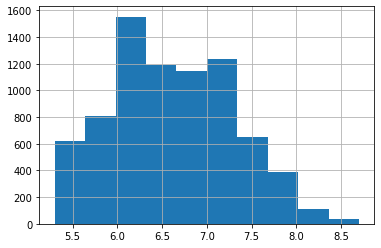

In [66]:
dfcopia['Nota do Público'].hist()

# **Conclusão**

Essas são algumas das técnicas de pré-processamento que podem ser utilizadas para tratamento dos dados antes da análise, é fundamental ter a capacidade de entender, explorar e tratar seus dados da melhor maneira possível.

É muito complicado conseguir bons resultados em uma Análise que tenham quantidades altas de valores faltantes, essas lacunas podem te levar a conclusões completamente equívocas. Ao limpar o seu dataset você consegue obter informações mais claras e objetivas.

As técnicas de pré-processamento e análise exploratória são fundamentais para obter uma compreensão completa dos dados antes de se aplicar técnicas de modelagem ou outras análises mais avançadas.